In [ ]:
!git clone https://github.com/AJITKUMAR130012/Cv_course_project-1.git

Cloning into 'Cv_course_project-1'...
remote: Enumerating objects: 3176, done.
remote: Total 3176 (delta 0), reused 0 (delta 0), pack-reused 3176
Receiving objects: 100% (3176/3176), 267.43 MiB | 26.21 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
!ls

best_model.pt  Cv_course_project-1  sample_data


In [ ]:
cd Cv_course_project-1

/content/Cv_course_project-1


In [ ]:
!ls

csv.ipynb  custom.ipynb  face.csv  Image  rename.ipynb	utils.py


In [ ]:
!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 26.0 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16444 sha256=62c6c88cf62ace776b2cbdfe98da74ecb57e90c9616bee44a74dc7dfc6d208ab
  Stored in directory: /root/.cache/pip/wheels/29/16/24/752e89d88d333af39a288421e64d613b5f652918e39ef1f8e3
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60962 sha256=2276cf3518199822996fb66f18298240fc1d60504f33b3fae73b4b3e74292fc0
  Stored in directory: /root/.cache/pip/w

In [ ]:
import os
import random
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import torch
torch.cuda.empty_cache()

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import torch 
import timm

import torch.nn.functional as F 
from torch import nn 
from torch.utils.data import Dataset, DataLoader 

from skimage import io
from sklearn.model_selection import train_test_split 

from tqdm import tqdm 

In [ ]:
#dir_list=["./Abhimanyu/","./Alok/", "./Dhriti/", "./Narendra/", "./Sayan/", "./Yogesh/","./Ajit/", "./Soni/","Yogeshwer/"]

In [ ]:
# t=[]
# for dir  in dir_list:
#   l=os.listdir(dir)
#   for img_path in l:
#     length=len(l)
#     t.append(img_path)
#     id=random.randint(0, length-1)
#     t.append(l[id])
#     random_dir_number=random.randint(0,len(dir_list)-1)
#     dirw=dir_list[random_dir_number]
#     n=os.listdir(dirw)
#     random_img=random.randint(0,len(n)-1)
#     t.append(n[random_img])
#     # break


#     # full_img_path=dir+img_path
#     # #print(full_img_path)
#     # img= cv2.imread(full_img_path)
#     # plt.imshow(img)
#     # plt.show()
#     # break

In [ ]:
# len(t)

In [ ]:
#path="/content/Cv_course_project-Will-delete-/Image"

In [ ]:
# l=os.listdir(path)
# print(len(l))
# print(l)

In [ ]:
# m=[]
# for i in range(len(l)):
#     m.append(l[i])
#     m.append(l[i])
# k=0
# for i in range(len(l)):
#     id=random.randint(0, len(l)-1)
#     m.insert(2*i+2+k, l[id])
#     k=k+1

# print(len(m))


In [ ]:
# def to_matrix(l, n):
#     return [l[i:i+n] for i in range(0, len(l), n)]

In [ ]:

# m=to_matrix(t,3)

In [ ]:
# c=np.array(m)
# c.dtype

In [ ]:
# c.shape

In [ ]:
#df=pd.DataFrame(data=c,columns=['Anchor','Positive','Negative'])
df=pd.read_csv("/content/Cv_course_project-1/face.csv")

In [ ]:
#df.to_csv('face.csv')


In [ ]:
df.head(42)

,Unnamed: 0,Anchor,Positive,Negative
0,0,B19BB017_1.jpg,B19BB017_64.jpg,B19EE054_75.jpg
1,1,B19BB017_10.jpg,B19BB017_81.jpg,D20CS001_92.jpg
2,2,B19BB017_100.jpg,B19BB017_44.jpg,M20AIE263_7.jpg
3,3,B19BB017_11.jpg,B19BB017_1.jpg,B19CSE109_33.jpg
4,4,B19BB017_12.jpg,B19BB017_14.jpg,B19EE024_59.jpg
5,5,B19BB017_13.jpg,B19BB017_14.jpg,M20AIE263_5.jpg
6,6,B19BB017_14.jpg,B19BB017_88.jpg,M21CS017_77.jpg
7,7,B19BB017_15.jpg,B19BB017_19.jpg,M20AIE263_87.jpg
8,8,B19BB017_16.jpg,B19BB017_82.jpg,B19CSE030_18.jpg
9,9,B19BB017_17.jpg,B19BB017_36.jpg,P22HS005_56.jpg


In [ ]:
row=df.iloc[4]
print(row)
print(row.Anchor)

Unnamed: 0                  4
Anchor        B19BB017_12.jpg
Positive      B19BB017_14.jpg
Negative      B19EE024_59.jpg
Name: 4, dtype: object
B19BB017_12.jpg


In [ ]:
DATA_DIR="/content/Cv_course_project-1/Image/"
BAtch_size=32
LR=0.001
EPOCHS=50
DEVICE='cuda'

In [ ]:
Anchor_img=io.imread(DATA_DIR+row.Anchor)
Negative_img=io.imread(DATA_DIR+row.Negative)
Positive_img=io.imread(DATA_DIR+row.Positive)

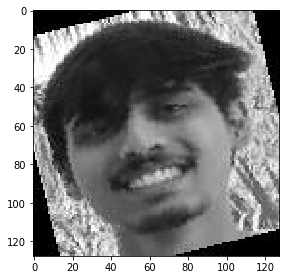

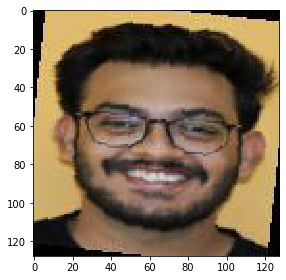

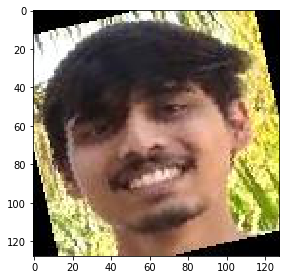

In [ ]:
io.imshow(Anchor_img)
plt.show()
io.imshow(Negative_img)
plt.show()
io.imshow(Positive_img)
plt.show()

In [ ]:
train_df, valid_df=train_test_split(df,test_size=0.20,random_state=0)

In [ ]:
train_df.shape, valid_df.shape

((1760, 4), (440, 4))

In [ ]:
## Create APN Dataset

In [ ]:
class APN_Dataset(Dataset):

  def __init__(self,df):
    self.df=df

  def __len__(self):
    return self.df.shape[0]

  def __getitem__(self,idx):
    row=self.df.iloc[idx]
    A_img=io.imread(DATA_DIR+row.Anchor)
    N_img=io.imread(DATA_DIR+row.Negative)
    P_img=io.imread(DATA_DIR+row.Positive)
    A_img=cv2.resize(A_img,(128,128))
    N_img=cv2.resize(N_img,(128,128))
    P_img=cv2.resize(P_img,(128,128))



    A_img=torch.from_numpy(A_img).permute(2,0,1)/255.0
    P_img=torch.from_numpy(P_img).permute(2,0,1)/255.0
    N_img=torch.from_numpy(N_img).permute(2,0,1)/255.0


    return A_img, P_img, N_img

  


In [ ]:
trainset=APN_Dataset(train_df)
validset=APN_Dataset(valid_df)

In [ ]:
len(trainset), len(validset)

(1760, 440)

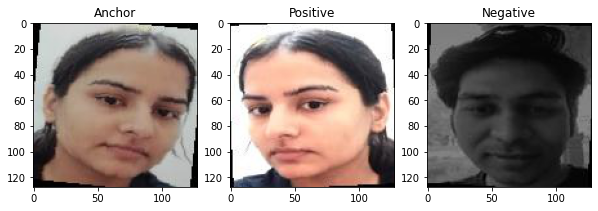

In [ ]:
idx = 41
A,P,N = trainset[idx]

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize= (10,5))

ax1.set_title('Anchor')
ax1.imshow(A.numpy().transpose((1,2,0)), cmap = 'gray')

ax2.set_title('Positive')
ax2.imshow(P.numpy().transpose((1,2,0)), cmap = 'gray')

ax3.set_title('Negative')
ax3.imshow(N.numpy().transpose((1,2,0)), cmap = 'gray')

## Load Dataset into Batches

In [ ]:
trainloader=DataLoader(trainset,batch_size=BAtch_size, shuffle=True) 
validloader=DataLoader(validset, batch_size=BAtch_size) 

In [ ]:
print(f"No. of batches in trainloader : {len(trainloader)}")
print(f"No. of batches in validloader : {len(validloader)}")

No. of batches in trainloader : 55
No. of batches in validloader : 14


In [ ]:

for A,P,N in trainloader: 
  print(A.shape)
  print(P.shape)
  print(N.shape)

  break
    
#print(f"One image batch shape : {A.shape}")

torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])


In [ ]:
efficientnet=timm.create_model('efficientnet_b0', pretrained='True')

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b0_ra-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_ra-3dd342df.pth


In [ ]:
efficientnet.classifier

Linear(in_features=1280, out_features=1000, bias=True)

## Create Model

In [ ]:
class APN_Model(nn.Module):
  def __init__(self,emb_size=512):
    super(APN_Model, self).__init__()

    self.efficientnet=timm.create_model('efficientnet_b0', pretrained='True')
    self.efficientnet.classifier=nn.Linear(in_features=self.efficientnet.classifier.in_features, out_features=emb_size)

  def forward(self,images):
    embeddings=self.efficientnet(images)
    return embeddings
  

In [ ]:
model=APN_Model()
model.to(DEVICE);

## Create Train and Eval function

In [ ]:
def train_fn(model, dataloader, optimizer, criterion):
  model.train()    # ONN Dropout Layer
  total_loss=0.0
  for A, P, N in tqdm(dataloader):
    A,P,N=A.to(DEVICE), P.to(DEVICE), N.to(DEVICE)
    A_embs=model(A)
    P_embs=model(P)
    N_embs=model(N)

    loss=criterion(A_embs,P_embs,N_embs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss+=loss.item()
  return total_loss/len(dataloader)


In [ ]:
def eval_fn(model, dataloader, criterion):
  model.eval()     # Off dropout layer
  total_loss=0.0
  for A, P, N in tqdm(dataloader):
    A,P,N=A.to(DEVICE), P.to(DEVICE), N.to(DEVICE)

    A_embs=model(A)
    P_embs=model(P)
    N_embs=model(N)
    loss=criterion(A_embs,P_embs,N_embs)
    total_loss+=loss.item()
  
  return total_loss


In [ ]:
criterion=nn.TripletMarginLoss(margin=2.0)
optimizer=torch.optim.Adam(model.parameters(), lr=LR)

# Create Training Loop

In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:
# import gc
# del variables
# gc.collect()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   18458 KB |   18458 KB |   18458 KB |       0 B  |\n|       from large pool |    5600 KB |    5600 KB |    5600 KB |       0 B  |\n|       from small pool |   12858 KB |   12858 KB |   12858 KB |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |   18458 KB |   18458 KB |   18458 KB |       0 B  |\n|       from large pool |    5600 KB |    5600 KB |

In [ ]:
best_valid_loss=np.Inf
for i in range (EPOCHS):
  train_loss=train_fn(model,trainloader,optimizer,criterion) 
  valid_loss=eval_fn(model,validloader, criterion)

  if valid_loss < best_valid_loss:
    torch.save(model.state_dict(), 'best_model.pt')
    best_valid_loss=valid_loss
    print("Saved_weight_success")
  print(f"Epochs : {i+1} train_loss : {train_loss} valid_loss : {valid_loss}")
  if best_valid_loss==0 and train_loss<=0.019:
    break

100%|██████████| 14/14 [00:04<00:00,  2.89it/s]


Saved_weight_success
Epochs : 1 train_loss : 0.6500942609526894 valid_loss : 10.118048340082169


100%|██████████| 14/14 [00:04<00:00,  2.97it/s]


Saved_weight_success
Epochs : 2 train_loss : 0.4272263285788623 valid_loss : 7.077554672956467


100%|██████████| 14/14 [00:04<00:00,  2.96it/s]


Saved_weight_success
Epochs : 3 train_loss : 0.2819473534822464 valid_loss : 5.79848650097847


100%|██████████| 14/14 [00:04<00:00,  2.86it/s]


Saved_weight_success
Epochs : 4 train_loss : 0.1914377987384796 valid_loss : 1.814920425415039


100%|██████████| 14/14 [00:05<00:00,  2.51it/s]


Saved_weight_success
Epochs : 5 train_loss : 0.23985624530098654 valid_loss : 1.378810465335846


100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


Epochs : 6 train_loss : 0.1346239366314628 valid_loss : 3.576680213212967


100%|██████████| 14/14 [00:04<00:00,  2.95it/s]


Epochs : 7 train_loss : 0.12849647402763367 valid_loss : 1.6516571938991547


100%|██████████| 14/14 [00:04<00:00,  2.93it/s]


Epochs : 8 train_loss : 0.06669319922273809 valid_loss : 1.5449635833501816


100%|██████████| 14/14 [00:05<00:00,  2.75it/s]


Saved_weight_success
Epochs : 9 train_loss : 0.04339346831495112 valid_loss : 0.9109411835670471


100%|██████████| 14/14 [00:05<00:00,  2.54it/s]


Saved_weight_success
Epochs : 10 train_loss : 0.05365063520995053 valid_loss : 0.6648713052272797


100%|██████████| 14/14 [00:04<00:00,  2.86it/s]


Epochs : 11 train_loss : 0.03319871588186784 valid_loss : 1.2840246707201004


100%|██████████| 14/14 [00:04<00:00,  3.00it/s]


Epochs : 12 train_loss : 0.07005707946690647 valid_loss : 0.9553325176239014


100%|██████████| 14/14 [00:04<00:00,  2.85it/s]


Epochs : 13 train_loss : 0.06061832688071511 valid_loss : 1.4777064323425293


100%|██████████| 14/14 [00:05<00:00,  2.53it/s]


Epochs : 14 train_loss : 0.02977750138802962 valid_loss : 1.156327486038208


100%|██████████| 14/14 [00:04<00:00,  2.85it/s]


Epochs : 15 train_loss : 0.0603131039576097 valid_loss : 4.106120049953461


100%|██████████| 14/14 [00:04<00:00,  3.04it/s]


Epochs : 16 train_loss : 0.04764790101484819 valid_loss : 2.1994429528713226


100%|██████████| 14/14 [00:04<00:00,  2.96it/s]


Epochs : 17 train_loss : 0.04174162880940871 valid_loss : 2.687679171562195


100%|██████████| 14/14 [00:05<00:00,  2.49it/s]


Epochs : 18 train_loss : 0.045980200442400844 valid_loss : 1.227376252412796


100%|██████████| 14/14 [00:05<00:00,  2.72it/s]


Epochs : 19 train_loss : 0.015253652767701582 valid_loss : 0.7471167594194412


100%|██████████| 14/14 [00:04<00:00,  3.00it/s]


Epochs : 20 train_loss : 0.03506407195871526 valid_loss : 1.349448323249817


100%|██████████| 14/14 [00:04<00:00,  2.95it/s]


Epochs : 21 train_loss : 0.03368968638506803 valid_loss : 1.9232815206050873


100%|██████████| 14/14 [00:05<00:00,  2.60it/s]


Epochs : 22 train_loss : 0.03510371229865334 valid_loss : 0.7972397804260254


100%|██████████| 14/14 [00:05<00:00,  2.76it/s]


Epochs : 23 train_loss : 0.04771047288721258 valid_loss : 1.624181553721428


100%|██████████| 14/14 [00:06<00:00,  2.17it/s]


Epochs : 24 train_loss : 0.08428179079836065 valid_loss : 2.051403522491455


100%|██████████| 14/14 [00:04<00:00,  2.91it/s]


Epochs : 25 train_loss : 0.11968414024873213 valid_loss : 3.7372715771198273


100%|██████████| 14/14 [00:04<00:00,  3.04it/s]


Epochs : 26 train_loss : 0.1761678695678711 valid_loss : 3.0494487285614014


100%|██████████| 14/14 [00:06<00:00,  2.32it/s]


Epochs : 27 train_loss : 0.15686726001175968 valid_loss : 0.9376020580530167


100%|██████████| 14/14 [00:05<00:00,  2.54it/s]


Saved_weight_success
Epochs : 28 train_loss : 0.06915655813433907 valid_loss : 0.4618387222290039


100%|██████████| 14/14 [00:05<00:00,  2.63it/s]


Epochs : 29 train_loss : 0.016174455935304814 valid_loss : 0.9988674372434616


100%|██████████| 14/14 [00:04<00:00,  2.96it/s]


Saved_weight_success
Epochs : 30 train_loss : 0.009542016007683493 valid_loss : 0.3856657398864627


100%|██████████| 14/14 [00:04<00:00,  3.02it/s]


Epochs : 31 train_loss : 0.006690323894674128 valid_loss : 0.9490595608949661


100%|██████████| 14/14 [00:05<00:00,  2.50it/s]


Epochs : 32 train_loss : 0.015015821023420854 valid_loss : 0.8239922821521759


100%|██████████| 14/14 [00:05<00:00,  2.79it/s]


Epochs : 33 train_loss : 0.023128723556345158 valid_loss : 1.1522546708583832


100%|██████████| 14/14 [00:04<00:00,  2.89it/s]


Saved_weight_success
Epochs : 34 train_loss : 0.014619083838029342 valid_loss : 0.21128329634666443


100%|██████████| 14/14 [00:04<00:00,  2.90it/s]


Epochs : 35 train_loss : 0.014883624423633923 valid_loss : 0.3433317691087723


100%|██████████| 14/14 [00:05<00:00,  2.46it/s]


Epochs : 36 train_loss : 0.005877996574748646 valid_loss : 0.5718330144882202


100%|██████████| 14/14 [00:05<00:00,  2.51it/s]


Saved_weight_success
Epochs : 37 train_loss : 0.008658722313967618 valid_loss : 0.20447683334350586


100%|██████████| 14/14 [00:04<00:00,  2.96it/s]


Epochs : 38 train_loss : 0.009287575700066306 valid_loss : 0.45246486365795135


100%|██████████| 14/14 [00:04<00:00,  2.92it/s]


Epochs : 39 train_loss : 0.007935233007777822 valid_loss : 1.1522291153669357


100%|██████████| 14/14 [00:04<00:00,  2.93it/s]


Epochs : 40 train_loss : 0.0385112464427948 valid_loss : 0.3683224618434906


100%|██████████| 14/14 [00:05<00:00,  2.49it/s]


Epochs : 41 train_loss : 0.0668525825847279 valid_loss : 1.9455293864011765


100%|██████████| 14/14 [00:05<00:00,  2.52it/s]


Epochs : 42 train_loss : 0.0690421388907866 valid_loss : 1.5995260179042816


100%|██████████| 14/14 [00:05<00:00,  2.80it/s]


Epochs : 43 train_loss : 0.07976678040894596 valid_loss : 5.819104939699173


100%|██████████| 14/14 [00:04<00:00,  2.92it/s]


Epochs : 44 train_loss : 0.13212719017809088 valid_loss : 1.3635784201323986


100%|██████████| 14/14 [00:05<00:00,  2.77it/s]


Epochs : 45 train_loss : 0.07017382329160517 valid_loss : 0.7120071649551392


100%|██████████| 14/14 [00:05<00:00,  2.39it/s]


Epochs : 46 train_loss : 0.03248754414645108 valid_loss : 1.3457547426223755


100%|██████████| 14/14 [00:05<00:00,  2.50it/s]


Epochs : 47 train_loss : 0.03393648104234175 valid_loss : 2.4499263763427734


100%|██████████| 14/14 [00:04<00:00,  2.88it/s]


Epochs : 48 train_loss : 0.01924739425832575 valid_loss : 1.5870463252067566


100%|██████████| 14/14 [00:04<00:00,  2.88it/s]


Epochs : 49 train_loss : 0.023504718054424632 valid_loss : 1.878313034772873


100%|██████████| 14/14 [00:04<00:00,  2.82it/s]

Epochs : 50 train_loss : 0.03755673657764088 valid_loss : 0.4756791740655899


# Get Anchor Embeddings

In [ ]:
def get_encoding_csv(model,anc_img_names):
  anc_img_names_arr=np.array(anc_img_names)
  encodings=[]
  model.eval()    #because no dropout layer
  with torch.no_grad():
    for i in tqdm(anc_img_names_arr):
      A=io.imread(DATA_DIR+i)
      A=cv2.resize(A,(128,128))
      A=torch.from_numpy(A).permute(2,0,1) /255.0
      A=A.to(DEVICE)

      A_enc=model(A.unsqueeze(0))      #(c,w,h)   --> (b,c,w,h)
      encodings.append(A_enc.squeeze().cpu().detach().numpy())
    encodings=np.array(encodings)
    encodings=pd.DataFrame(encodings)
    df_enc=pd.concat([anc_img_names, encodings], axis=1)
  
  return df_enc


In [ ]:
valid_df['Anchor']

1320     B19EE054_28.jpg
1367     B19EE054_72.jpg
1291     B19EE043_91.jpg
264      B19CSE030_7.jpg
728     B19CSE089_35.jpg
              ...       
446     B19CSE058_52.jpg
1005     B19EE032_13.jpg
1919     M21CS017_60.jpg
708     B19CSE089_16.jpg
1546    M20AIE263_83.jpg
Name: Anchor, Length: 440, dtype: object

In [ ]:
model.load_state_dict(torch.load('best_model.pt'))
df_enc=get_encoding_csv(model, df['Anchor'])
train_enc=get_encoding_csv(model, train_df['Anchor'])
valid_enc=get_encoding_csv(model, valid_df['Anchor'])

100%|██████████| 440/440 [00:06<00:00, 65.45it/s]


In [ ]:
df_enc.to_csv('df_enc.csv', index=False)


#df_enc.head()

In [ ]:
df_enc=pd.read_csv("df_enc.csv")
train_enc, valid_enc=train_test_split(df_enc,test_size=0.20,random_state=0)

In [ ]:
df_enc.head(5)

,Anchor,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,B19BB017_1.jpg,-1.899196,1.814510,3.613264,3.951827,3.918925,-0.411227,2.241250,-0.230610,-6.136243,...,-3.197925,2.019432,-1.203154,2.462088,-0.255439,0.648438,1.829301,-2.942432,0.848916,1.146705
1,B19BB017_10.jpg,-1.860453,1.731161,3.510333,3.874328,3.803131,-0.418110,2.192044,-0.256063,-5.993075,...,-3.154147,1.946652,-1.151658,2.400299,-0.278201,0.630929,1.799205,-2.853343,0.816753,1.065570
2,B19BB017_100.jpg,-2.070047,1.417928,3.732975,4.099886,4.261918,-0.543218,2.423084,-0.422136,-6.670184,...,-3.499832,1.846248,-1.081471,2.664947,-0.223886,0.785171,1.997701,-2.719993,0.788844,0.955365
3,B19BB017_11.jpg,-1.366829,1.467353,2.490914,3.252514,2.467095,-0.161186,1.284453,-0.115220,-3.926640,...,-2.275015,1.444380,-0.881949,1.361548,-0.515815,0.243351,1.192616,-2.127024,0.320349,1.116150
4,B19BB017_12.jpg,-1.540026,1.371560,2.930830,3.378299,3.130446,-0.361182,1.721511,-0.205565,-4.875978,...,-3.004182,1.559491,-0.873789,1.956150,-0.346995,0.486585,1.444699,-2.116494,0.468125,0.996818


In [ ]:
train_enc.sample(5)

,Anchor,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
2008,M21CS056_16.jpg,0.392412,1.583507,0.074929,0.685722,-0.276847,-0.083970,0.097314,-0.080107,1.095652,...,-1.471104,0.168961,-0.000461,0.036993,0.040254,-0.714846,-0.525364,-1.683097,0.498555,1.495185
2140,P22HS005_63.jpg,-0.060907,-0.472647,-0.089050,-0.420234,0.362126,-1.605011,0.895538,-1.967564,0.469500,...,-2.646639,-1.939956,1.162258,1.794131,1.436395,-0.446936,-0.217246,1.081426,0.497982,-0.879895
850,B19CSE109_57.jpg,0.576262,1.199828,-1.074065,-2.909051,-1.286321,0.206767,-0.852020,1.182488,2.231622,...,1.524212,1.189068,-0.342754,-0.309048,0.325532,0.164272,-0.213967,0.168493,0.418353,0.184503
1238,B19EE043_45.jpg,3.137169,-2.374877,-3.875839,-4.743297,-2.270747,2.865123,-1.510953,-0.207640,2.995814,...,1.268853,-0.471706,1.332753,-3.524171,-0.961715,-0.966738,-1.788148,-0.995037,-0.387533,0.799844
1471,D20CS001_92.jpg,-0.168774,-1.238897,-0.056704,1.015851,0.300967,0.231514,-0.072831,-0.084613,0.139117,...,-0.655349,-0.615926,0.110753,-0.415403,-0.305391,-0.370348,0.346706,1.449578,-0.786674,0.974579


In [ ]:
valid_enc.head(5)

,Anchor,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
1320,B19EE054_28.jpg,1.078878,-1.328655,-1.753581,-1.530258,-0.597896,1.698103,-0.967853,0.502219,0.787137,...,1.073243,0.566539,0.248818,-1.378721,-0.771284,-0.468174,-0.185360,-0.340677,0.202744,0.575101
1367,B19EE054_72.jpg,0.787460,-1.066083,-1.823093,-2.353639,-0.679610,0.823241,-0.856028,-0.173740,1.214847,...,1.619102,0.696082,0.323584,-0.784874,0.000914,-0.174499,0.091684,0.396997,1.105246,0.742371
1291,B19EE043_91.jpg,3.167110,-3.157895,-4.244344,-3.887747,-2.220172,3.602146,-1.781424,0.227873,2.439533,...,1.068259,-0.029377,1.349575,-4.043993,-1.402055,-1.590202,-1.494074,-0.745026,-0.477251,0.976655
264,B19CSE030_7.jpg,-0.193914,1.179080,-0.575177,-1.993371,-2.028378,-1.390940,-1.016606,0.704063,3.198333,...,0.247431,-0.114592,0.199091,0.547666,0.875676,-0.250408,-0.526121,2.785118,-0.990951,-1.437829
728,B19CSE089_35.jpg,-1.282444,-0.967935,-0.035129,2.042394,0.254670,-0.212994,-0.202441,-0.940043,-1.427981,...,-0.296761,0.501568,-0.203578,-0.192162,-0.910496,-0.613518,1.361954,0.597450,-0.132093,0.085277


In [ ]:
df_enc['0'].isnull().sum(), train_enc['0'].isnull().sum(), valid_enc['0'].isnull().sum()

(0, 0, 0)

In [ ]:
df_enc.shape, train_enc.shape, valid_enc.shape

((2200, 513), (1760, 513), (440, 513))

# Inference

In [ ]:
def euclidean_dist(img_enc, anc_enc_arr):
  dist=np.sqrt(np.dot(img_enc-anc_enc_arr,(img_enc-anc_enc_arr).T))
  return dist

In [ ]:
len(valid_enc)

440

In [ ]:
total_cn=0
for idx in range(len(valid_enc)):
  img_name=valid_enc['Anchor'].iloc[idx]
  original_name=img_name
  #print(img_name)
  #img_name=valid_df['Anchor'].iloc[idx]
  img_path=DATA_DIR+  img_name
  #print(img_path)
  # img_path="/content/Dhriti.jpeg"
  img=io.imread(img_path)
  img=torch.from_numpy(img).permute(2,0,1) / 255.0
  model.eval()

  with torch.no_grad():
    img=img.to(DEVICE)
    img_enc=model(img.unsqueeze(0))
    img_enc=img_enc.detach().cpu().numpy()
  anc_enc_arr=df_enc.iloc[:,1:].to_numpy()
  anc_img_names=df_enc['Anchor']
  distance=[]
  for i in range(anc_enc_arr.shape[0]):
    dist=euclidean_dist(img_enc, anc_enc_arr[i: i+1, :])
    distance=np.append(distance,dist)
  closest_idx= np.argsort(distance)
  cn=0
  # for i in range(5):
  #   if df.iloc[closest_idx[i]].Anchor[0:9]=="Yogeshwer" and df.iloc[closest_idx[i]].Anchor[0:9]==original_name[0:9]:
  #     cn+=1
  #   elif df.iloc[closest_idx[i]].Anchor[0:6]=="Yogesh" and df.iloc[closest_idx[i]].Anchor[0:6]==original_name[0:6]:
  #     cn+=1
    

  #   elif df.iloc[closest_idx[i]].Anchor[0:4]==original_name[0:4]:
  #     cn+=1


  for i in range(5):


    if df.iloc[closest_idx[i]].Anchor[0:7]==original_name[0:7]:
      cn+=1
  if cn>=3:
    total_cn+=1


print(total_cn)

405


In [ ]:
acc=(total_cn/len(valid_enc))*100
print(acc)

92.04545454545455


In [ ]:
import random
idx=random.randint(0,440) 
img_name=valid_enc['Anchor'].iloc[idx]

#img_name=valid_df['Anchor'].iloc[idx]
img_path=DATA_DIR+  img_name

print(img_path)
# img_path="/content/Dhriti.jpeg"
img=io.imread(img_path)
img=torch.from_numpy(img).permute(2,0,1) / 255.0
model.eval()

with torch.no_grad():
  img=img.to(DEVICE)
  img_enc=model(img.unsqueeze(0))
  img_enc=img_enc.detach().cpu().numpy()
  

/content/Cv_course_project-1/Image/M21CI001_33.jpg


In [ ]:
anc_enc_arr=df_enc.iloc[:,1:].to_numpy()
anc_img_names=df_enc['Anchor']

In [ ]:
distance=[]
for i in range(anc_enc_arr.shape[0]):
  dist=euclidean_dist(img_enc, anc_enc_arr[i: i+1, :])
  distance=np.append(distance,dist)



In [ ]:
#print(distance)

In [ ]:
closest_idx= np.argsort(distance)
for i in range(5):
  print([closest_idx[i]])

[1614]
[1672]
[1674]
[1624]
[1604]


In [ ]:
distance[closest_idx[3]]

2.7229942999795527

In [ ]:
# from utils import plot_closest_imgs

# plot_closest_imgs(anc_img_names, DATA_DIR, img, img_path, closest_idx, distance, no_of_closest = 5);

In [ ]:
data_dir="/content/Cv_course_project-1/Image/"

In [ ]:
row=df.iloc[closest_idx[0]]
print(data_dir+row.Anchor)
#result_img=Image.open(DATA_DIR+row.Anchor)

/content/Cv_course_project-1/Image/M21CI001_33.jpg


In [ ]:
result_imh=cv2.imread(data_dir+row.Anchor)

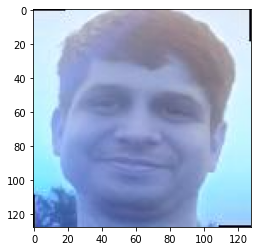

In [ ]:
plt.imshow(result_imh)

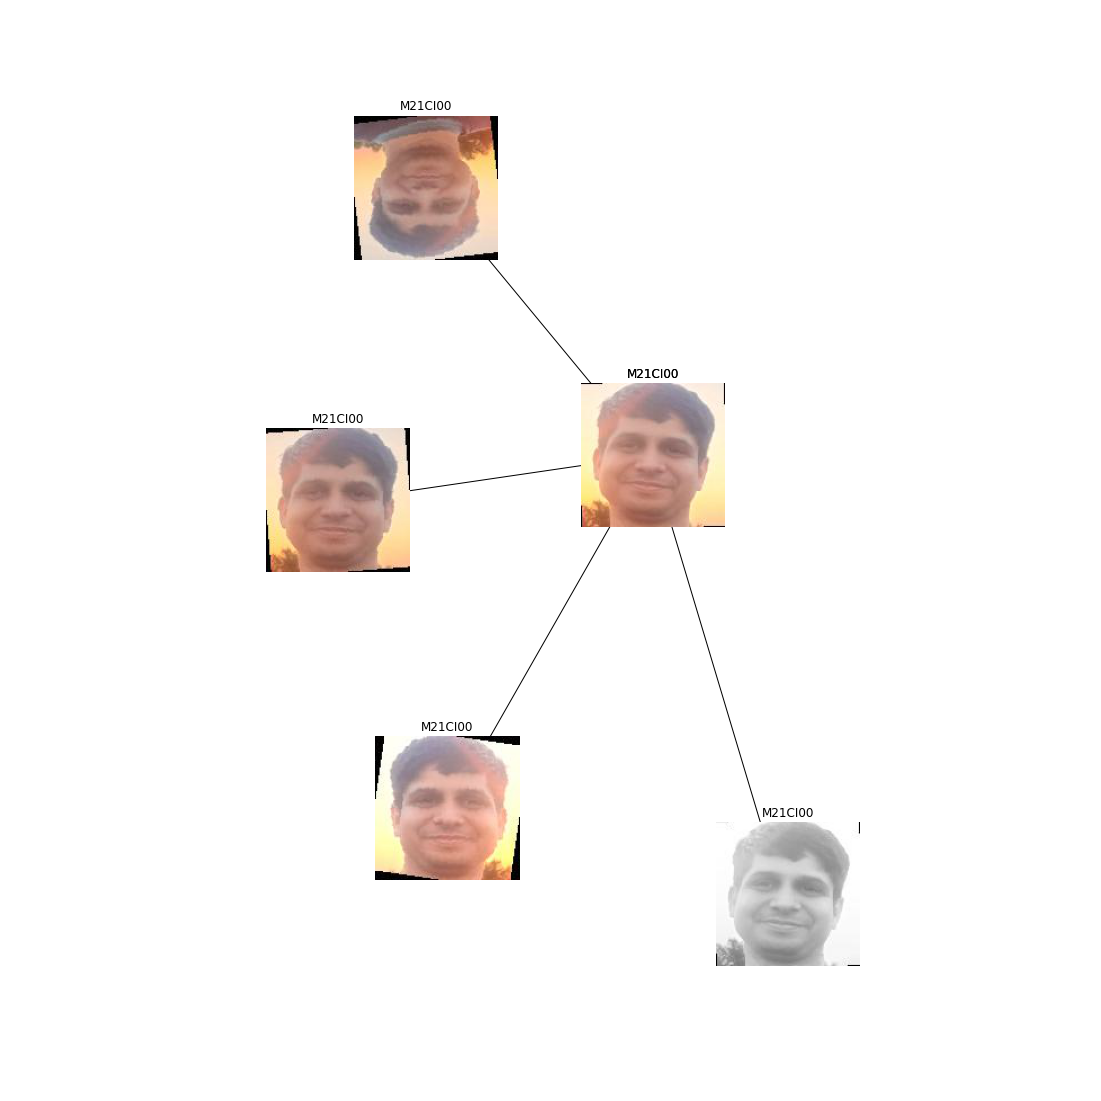

In [ ]:
from utils import plot_closest_imgs

plot_closest_imgs(anc_img_names, DATA_DIR, img, img_path, closest_idx, distance, no_of_closest = 5);

In [ ]:
df_enc['Anchor']

0         B19BB017_1.jpg
1        B19BB017_10.jpg
2       B19BB017_100.jpg
3        B19BB017_11.jpg
4        B19BB017_12.jpg
              ...       
2195     P22HS005_53.jpg
2196     P22HS005_54.jpg
2197     P22HS005_55.jpg
2198     P22HS005_56.jpg
2199     P22HS005_57.jpg
Name: Anchor, Length: 2200, dtype: object

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import PIL
import io
import html
import time

In [ ]:
def js_to_image(js_reply):
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
def captureFace(filename='newFace.png', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # save image
  cv2.imwrite(filename, img)

  return img

<IPython.core.display.Javascript object>

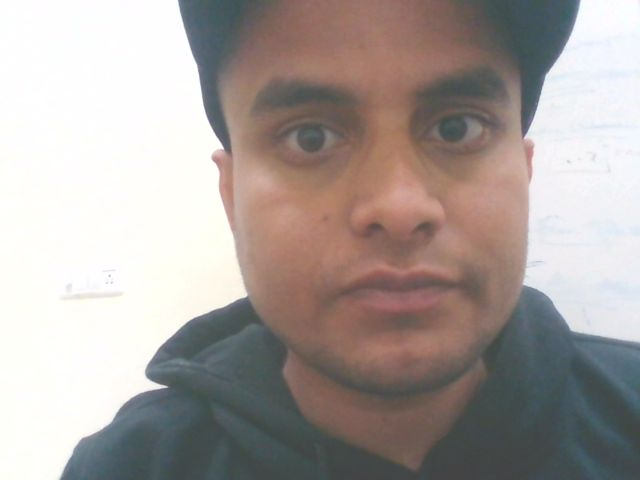

In [ ]:
try:
  face = captureFace('newFace.png')
  cv2_imshow(face)
except Exception as err:
  print(str(err))

In [ ]:
imgNew=torch.from_numpy(face).permute(2,0,1) / 255.0
model.eval()

with torch.no_grad():
  imgNew=imgNew.to(DEVICE)
  img_enc_new=model(imgNew.unsqueeze(0))
  img_enc_new=img_enc_new.detach().cpu().numpy()

In [ ]:
anc_enc_arr_new=df_enc.iloc[:,1:].to_numpy()
anc_img_names_new=df_enc['Anchor']

In [ ]:
distance_new=[]
for i in range(anc_enc_arr_new.shape[0]):
  dist_new=euclidean_dist(img_enc_new, anc_enc_arr_new[i: i+1, :])
  distance_new=np.append(distance_new,dist_new)

In [ ]:
closest_idx= np.argsort(distance_new)
for i in range(5):
  print([closest_idx[i]])

[1693]
[1634]
[1674]
[1604]
[1672]


In [ ]:
distance_new[closest_idx[0]]

7.601762913550923

In [ ]:
data_dir="/content/Cv_course_project-1/Image/"

In [ ]:
row=df.iloc[closest_idx[3]]
print(data_dir+row.Anchor)
#result_img=Image.open(DATA_DIR+row.Anchor)

/content/Cv_course_project-1/Image/M21CI001_24.jpg


In [ ]:
result_imh=cv2.imread(data_dir+row.Anchor)

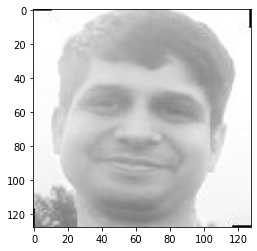

In [ ]:
plt.imshow(result_imh)